# **Movie genre classification and line prediction, trying to run LSTM and CNN models**

*This dataset is for different film genres and film lines with a total number of 22580, I removed the dataset number for train to 15471 in order to run the code in a more portable way. val and train's dataset number is around 5k to 6k as a reference.
LSTM, CNN, and MultinomialNB to train the dataset model and make predictions of movie lines.And use LDA, IF-IDF, and sentence_transformers to get some data*

## Import the required modules

In [1]:
pip install panda

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing essential libraries Importing essential libraries for visualization
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Import data** 

In [3]:
# Loading the dataset
df = pd.read_csv('/home/featurize/dataset/movie_train.csv')

In [4]:
df = pd.read_csv("/home/featurize/dataset/movie_train.csv",encoding="utf-8")
print(df)

          id                                               text     genre
0          0  eady dead, maybe even wishing he was. INT. 2ND...  thriller
1          2  t, summa cum laude and all. And I'm about to l...    comedy
2          3   up Come, I have a surprise.... She takes him ...     drama
3          4  ded by the two detectives. INT. JEFF'S APARTME...  thriller
4          5  nd dismounts, just as the other children reach...     drama
...      ...                                                ...       ...
15465  19343  ce time. ROCKY Thanks, Mr. Gazzo. Rocky enters...     drama
15466  19345  evere bandages on the spear caused holes of hi...    action
15467  19348  en at DR. SCOTT. BRAD JANET Dr. Scott! FRANK G...    comedy
15468  19349  bs, who crashes into his computer table, sendi...  thriller
15469  19350   it all. ARLO blows BRYNNER grunts continues u...  thriller

[15470 rows x 3 columns]


In [5]:
dataset_dir = '/home/featurize/dataset/movie_train.csv'

In [6]:
train_path = os.path.join(dataset_dir, '/home/featurize/dataset/movie_train.csv')
test_path = os.path.join(dataset_dir, '/home/featurize/dataset/movie_test.csv')
print('Training_set_path', train_path)
print('Testing_set_path', test_path)

Training_set_path /home/featurize/dataset/movie_train.csv
Testing_set_path /home/featurize/dataset/movie_test.csv


# Data Cleaning and Preprocessing
# Exploring the dataset

In [7]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [8]:
df.shape

(15470, 3)

In [9]:
#df.head(10)

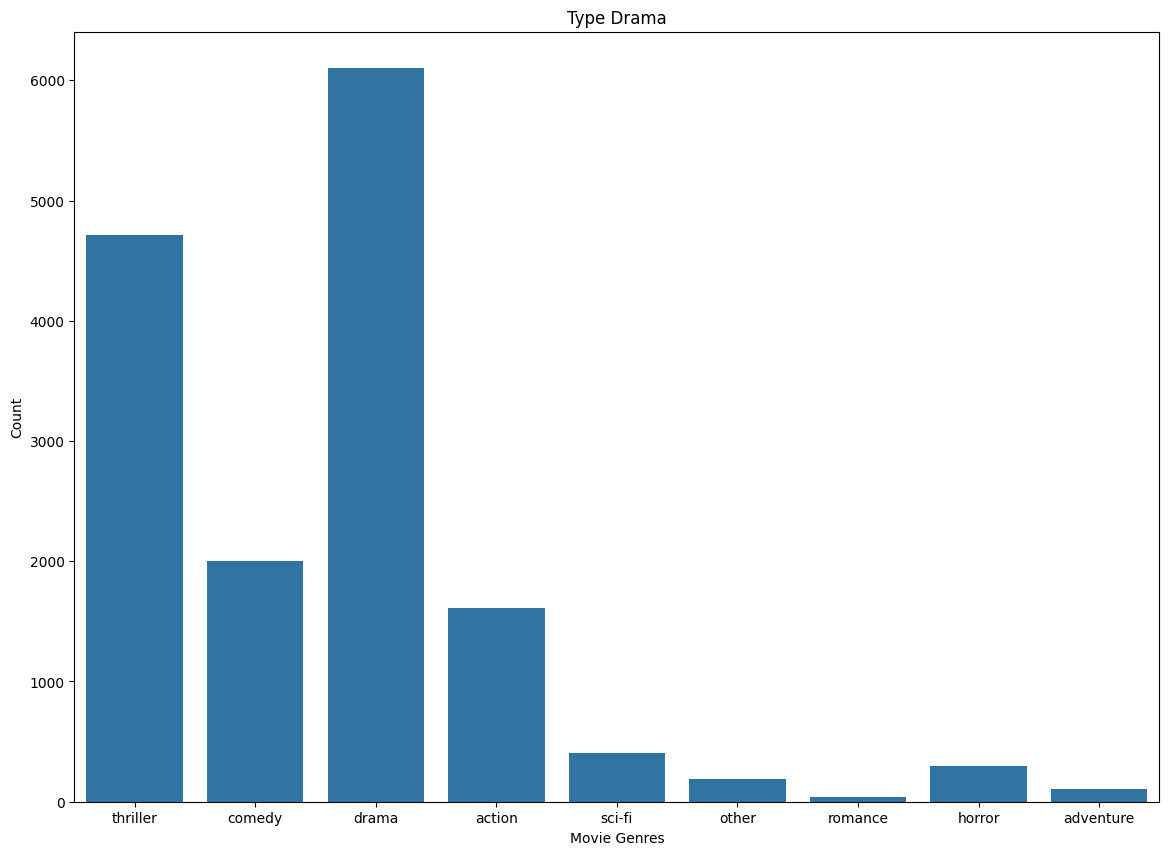

In [10]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(14,10))
sns.countplot(x='genre', data=df)
plt.ylabel('Count')
plt.xlabel('Movie Genres')
plt.title('Type Drama')
plt.show()


In [11]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [12]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [13]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [14]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [15]:
pip install nltk

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1007)>


In [17]:
df.shape

(15470, 2)

In [18]:
(22579, 2)

(22579, 2)

In [19]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [20]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [21]:
df[df['genre']==4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       15444, 15447, 15450, 15451, 15454, 15456, 15457, 15459, 15463, 15465],
      dtype='int64', length=6099)

In [22]:
len(corpus)

15470

In [23]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

In [24]:
pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


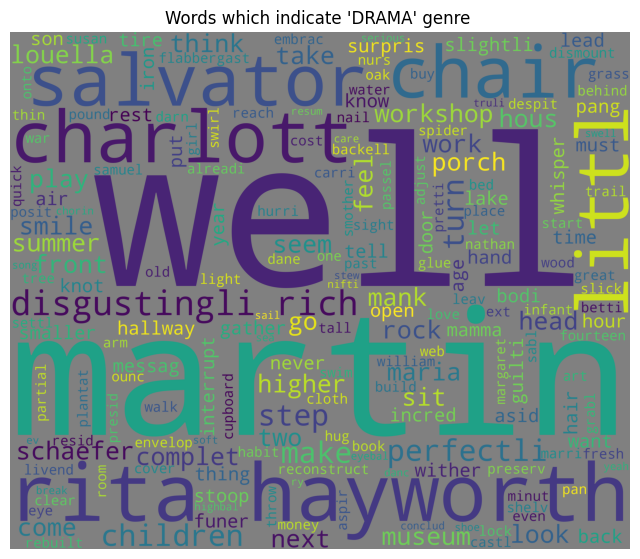

In [29]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='gray', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

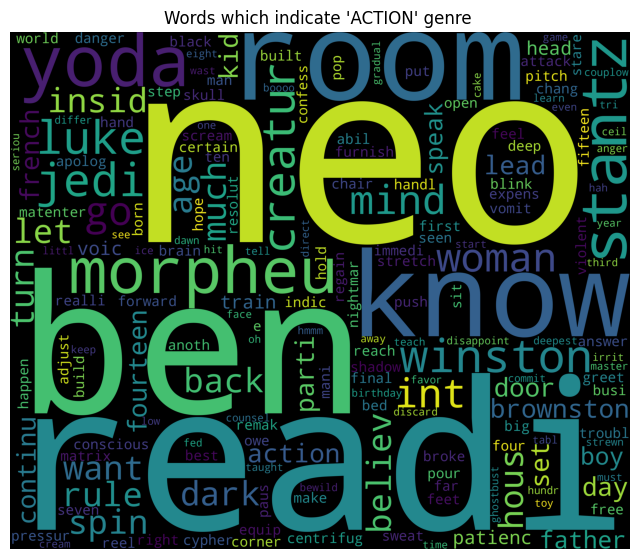

In [30]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='black', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

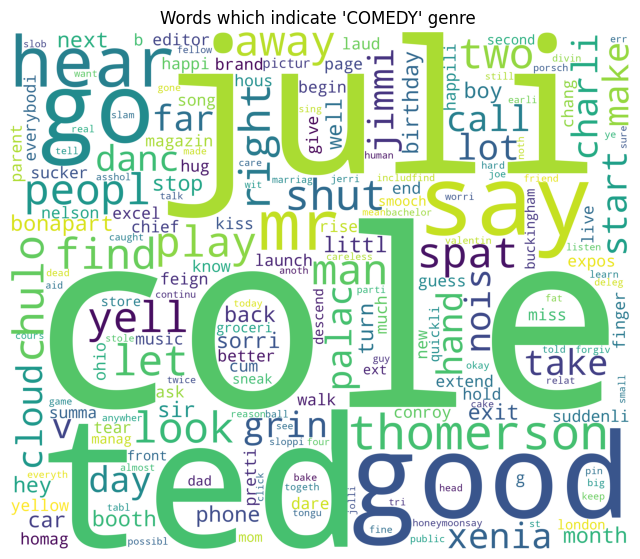

In [35]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [36]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [37]:
y = df['genre'].values

#  **Try LSTM and CNN** 

# LSTM

In [60]:
import os
data_dir = '/home/featurize/dataset'
print(os.listdir(data_dir))

['movie_test.csv', 'movie_train.csv', 'movie_val.csv']


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight as cw


In [72]:

!pip install keras   -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [79]:
!pip install tensorflow -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [81]:
from keras import Sequential

from keras.models import Model

from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding,BatchNormalization,Add,concatenate,Flatten
from keras.layers import Conv1D,Conv2D,Convolution1D,MaxPool1D,SeparableConv1D,SpatialDropout1D,GlobalAvgPool1D,GlobalMaxPool1D,GlobalMaxPooling1D
#from keras.pooling import GlobalMaxPooling1D
from keras.layers import MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D

from keras.optimizers import RMSprop,Adam

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [256]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",NaN
1,2,"t, summa cum laude and all. And I'm about to l...",NaN
2,3,"up Come, I have a surprise.... She takes him ...",NaN
3,4,ded by the two detectives. INT. JEFF'S APARTME...,NaN
4,5,"nd dismounts, just as the other children reach...",NaN
5,6,breadth of the bluff. Gabe pulls out his ancie...,NaN
6,7,uilding. A MAN in pajamas runs out into the ra...,NaN
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,NaN
8,10,"Memphis goes back into the garage, Budgy cack...",NaN
9,11,e reels as the world spins. Sweat pours off hi...,NaN


In [128]:
train_df = pd.read_csv("/home/featurize/dataset/movie_train.csv",encoding="utf-8",names=["Index","text","genre"])
valid_df = pd.read_csv("/home/featurize/dataset/movie_val.csv",encoding="utf-8",names=["Index","text","genre"])
test_df = pd.read_csv("/home/featurize/dataset/movie_test.csv",encoding="utf-8",names=["Index","text","genre"])


In [129]:
#可能报废
#train_df = pd.read_csv("/home/featurize/dataset/movie_train.csv",encoding="utf-8",header=None,sep="\t",names=["text","id"])
#valid_df = pd.read_csv("/home/featurize/dataset/movie_val.csv",encoding="utf-8",header=None,sep="\t",names=["text","id"])
#test_df = pd.read_csv("/home/featurize/dataset/movie_test.csv",encoding="utf-8",header=None,sep="\t",names=["text","id"])


In [170]:
print(train_df)


    Index                                               text     genre
0   10653  nd made his way into this room. His sister's r...  thriller
1    6253  CH NIGHT Anna waits at the boat. Neville runs ...     drama
2   14963  ns its huge jaws menacingly, all the time star...    action
3    4996  ightning. REAGAN Just stay cool. Everybody sta...     drama
4   12090  t kind of game? MAN Turn off the light. Her ha...  thriller
..    ...                                                ...       ...
45  19301  our rectum to change that shitty attitude of y...       NaN
46  13444  like this. This is a big moment for me ANNIE o...       NaN
47  13151  ley's place can't ask any questions or talk ou...       NaN
48  13766  the crowds to Bennie's depot. The streets are ...       NaN
49  23312  oseph? BELLIARD I don't know what has happened...       NaN

[22366 rows x 3 columns]


## Category table figures

In [171]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [173]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",NaN
1,2,"t, summa cum laude and all. And I'm about to l...",NaN
2,3,"up Come, I have a surprise.... She takes him ...",NaN
3,4,ded by the two detectives. INT. JEFF'S APARTME...,NaN
4,5,"nd dismounts, just as the other children reach...",NaN
5,6,breadth of the bluff. Gabe pulls out his ancie...,NaN
6,7,uilding. A MAN in pajamas runs out into the ra...,NaN
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,NaN
8,10,"Memphis goes back into the garage, Budgy cack...",NaN
9,11,e reels as the world spins. Sweat pours off hi...,NaN


In [174]:
# re-order
train_df = train_df.sample(frac=1).reset_index(drop=True)


In [175]:
train_df


,Index,text,genre
0,1487,you know who I am? B 9 You are me. DATA No. My...,thriller
1,19317,. A gang of his BROTHERS walk behind him. DON ...,drama
2,4500,"im, the same guy we saw when Bo Catlett was he...",thriller
3,17192,ser and he thrusts out his mailed fist to keep...,drama
4,11940,quickly the last few steps and slips into the ...,thriller
...,...,...,...
22361,4774,ette speaking to the Floor Clerk. SUZETTE And ...,drama
22362,17136,cks up last. INT. PLATFORM IN SERVICE SHAFT Th...,thriller
22363,18059,0 1892. Right. He crosses with executive towar...,comedy
22364,17124,T SECRETARY Nothing. JOE Thank you. Joe shuts ...,comedy


In [176]:
valid_df


,Index,text,genre
0,5634,his stock promoting was phoney and the card ga...,comedy
1,3722,n't kill the baby. LEVEAU halting You have pro...,drama
2,1716,"The recorded crowd screams with laughter, as ...",horror
3,6932,n! My God! suddenly energized You can't fight ...,drama
4,1389,mbs and you had a face. And a name. THE PATIEN...,drama
...,...,...,...
45,19301,our rectum to change that shitty attitude of y...,NaN
46,13444,like this. This is a big moment for me ANNIE o...,NaN
47,13151,ley's place can't ask any questions or talk ou...,NaN
48,13766,the crowds to Bennie's depot. The streets are ...,NaN


In [177]:
# re-order
valid_df = valid_df.sample(frac=1).reset_index(drop=True)


In [178]:
valid_df


,Index,text,genre
0,805,"here it is. Good. SALIERI Majesty, I hope you ...",drama
1,3865,We'll toss it when we make the blind curve. E...,thriller
2,1071,"step toward that, not even perceptible, but i...",other
3,5900,"at a shiny gold cherub dangling from a small, ...",drama
4,3710,... Isabella laughs. She kisses him under the ...,drama
...,...,...,...
6890,5675,"f your water? JUDGE Get on with it, counselor!...",action
6891,3689,court. HAWKINS is flanked by MACE and SANDRA.....,drama
6892,5014,"motion earthquake, large boulders and giant cr...",thriller
6893,7111,e device as she addresses the four VETERANS. S...,drama


In [179]:
test_df


,Index,text,genre
0,721,"hed fragment of a briefcase handle. T.J. Yes, ...",NaN
1,13340,"ess. DOCTOR quiet, careful All right, nurse, w...",NaN
2,10012,. ICH Kampai. They clink glasses. Ich drinks i...,NaN
3,2008,e was a tree right there... he points Blocking...,NaN
4,9434,"iled up beside him, uneaten. Beside him, Fathe...",NaN
...,...,...,...
5071,9644,where Mills stands looking up at the wall. Th...,NaN
5072,21305,ished walls. Giant leaves and vines burst insi...,NaN
5073,13617,omething where a tycoon buys a lousy team and ...,NaN
5074,23862,ou can have it your way or you can have it his...,NaN


In [180]:
# re-order
test_df = test_df.sample(frac=1).reset_index(drop=True)


In [181]:
test_df

,Index,text,genre
0,9793,ON THE LEFT. SPLIT SCREEN INT. DIANE'S BEDROO...,NaN
1,16788,"ou know, things to see, people to do? He laugh...",NaN
2,11677,"pas tries, he heads for them. PARRISH to the ...",NaN
3,7300,Yeah boss? Again we hear the same muffled cri...,NaN
4,22703,trying to keep a straight face elbows him. Si...,NaN
...,...,...,...
5071,22443,er them. CAMERA PANS BACK to the Monster as he...,NaN
5072,21329,ranging my assassination. TITCH We meant only ...,NaN
5073,18161,derivations...I remember I was at this lecture...,NaN
5074,12468,! He rises up in the torchlight. The Picts tau...,NaN


In [182]:
print(train_df.shape,valid_df.shape,test_df.shape)


(22366, 3) (6895, 3) (5076, 3)


In [183]:
valid_df = pd.concat([valid_df,test_df[:50]],axis=0)


In [184]:
# consolidation
train_df = pd.concat([train_df,valid_df],axis=0)
print(train_df.shape)


(29311, 3)


Text(0.5, 0, 'genre')

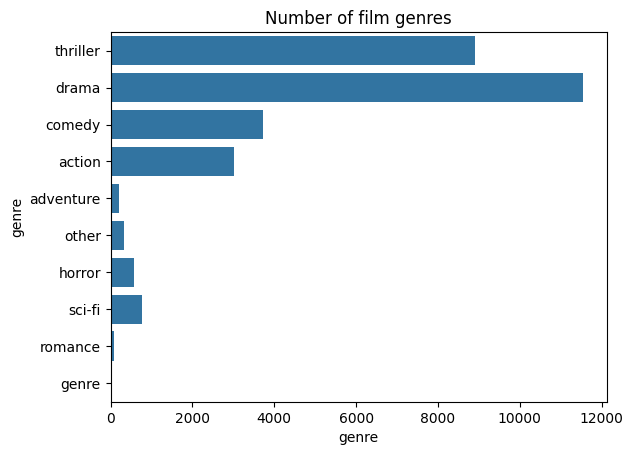

In [186]:
# Get the statistics.
sns.countplot(train_df["genre"])
plt.title("Number of film genres")
plt.xlabel("genre")


## Label data processing

In [188]:
x_train = train_df["text"]
y_train = train_df["genre"]


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = y_train.reshape(-1,1)

## Text data processing

Tokenizer Tokenizer is a class for vectorising text, or converting text into a sequence (i.e. a list consisting of the subscripts of words in a dictionary, counting from 1)
Class methods
fit_on_texts(texts) :texts list of texts to use for training
texts_to_sequences(texts) :list of texts to be converted to sequences return value: list of sequences, each sequence in the list corresponds to a piece of input text

padding sequences pad_sequences converts sequences of length nb_smaples to (nb_samples,nb_timesteps)2Dnumpy attay. if maxlen is supplied, nb_timesteps=maxlen, # otherwise its value is the longest sequence.
Otherwise its value is the length of the longest sequence.
All other sequences shorter than that length are padded with zeros at the end to reach that length. Sequences longer than nb_timesteps are staged to make them match that target length.

In [189]:
max_words = len(set(" ".join(x_train).split()))
max_len = x_train.apply(lambda x:len(x)).max()


tok = Tokenizer(num_words=max_words)

tok.fit_on_texts(x_train)

sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


ModelCheckpoint: this callback function will save the model to filepath after each epoch.
EarlyStopping: this callback function will stop the training when the monitoring value is no longer improving.
ReduceLROnPlateau: reduces the learning rate when the evaluation metrics no longer improve. Reducing the learning rate by a factor of 2 or 10 usually gives better results when learning has stalled. This callback function checks the metrics and reduces the learning rate if no model performance improvement is seen in the patient epoch.

In [190]:
print("Setting Callbacks")

checkpoint = ModelCheckpoint("model.h5",
                                                     monitor="val_acc",
                                                     verbose=1,
                                                     save_best_only=True,
                                                     mode="max")

early_stopping = EarlyStopping(monitor="val_loss",
                                                     patience=3,
                                                     verbose=1,
                                                     restore_best_weights=True,
                                                     mode="min")

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                                                      factor=0.5,
                                                      patience=2,
                                                      verbose=1,
                                                      mode="min")

callbacks=[checkpoint,early_stopping,reduce_lr]


Setting Callbacks


# Defining Deep Learning Models RNN

In [191]:
# Defining RNN
def RNN():
    model = Sequential()
    
    model.add(Embedding(max_words,128,input_length=max_len))
    model.add(LSTM(64))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(256,activation="relu"))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Dense(64,activation="relu"))

    model.add(Dropout(0.5))
    
    model.add(Dense(1,activation="sigmoid"))
    
    model.summary()
    
    return model


In [192]:
# pic
def plot_performance(history=None,figure_directory=None,ylim_pad=[0,0]):
    xlabel="Epoch"
    legends=["Training","Validation"]
    
    plt.figure(figsize=(20,5))
    
    y1=history.history["accuracy"]
    y2=history.history["val_accuracy"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[0]
    max_y=max(max(y1),max(y2))+ylim_pad[0]
    
    plt.subplot(121)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Accuracy\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    
    y1=history.history["loss"]
    y2=history.history["val_loss"]
    
    min_y=min(min(y1),min(y2))-ylim_pad[1]
    max_y=max(max(y1),max(y2))+ylim_pad[1]
    
    plt.subplot(122)
    
    plt.plot(y1)
    plt.plot(y2)
    
    plt.title("Model Loss:\n",fontsize=17)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel("Loss",fontsize=15)
    plt.ylim(min_y,max_y)
    plt.legend(legends,loc="upper left")
    plt.grid()
    plt.show()


In [193]:
rnn_model = RNN()

2024-02-28 18:24:58.683891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 18:24:58.755567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-28 18:24:58.756068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         20247040  
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [194]:
loss = "binary_crossentropy"
metrics=["accuracy"]

In [195]:
# RNN model training
print("Starting...\n")
learning_rate=0.001
optimizer=Adam(learning_rate)

print("\n\nCompliling Model...\n")
rnn_model.compile(optimizer=optimizer,
                                 loss=loss,
                                 metrics=metrics)

verbose = 1
epochs=100
batch_size=128
validation_split=0.1
print("Trainning Model...\n")

rnn_history=rnn_model.fit(sequences_matrix,
                                            y_train,
                                            batch_size=batch_size,
                                            epochs=epochs,
                                            verbose=1,
                                            callbacks=callbacks,
                                            validation_split=validation_split)



Starting...



Compliling Model...

Trainning Model...

Epoch 1/100


2024-02-28 18:25:52.506811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8700
2024-02-28 18:25:53.326674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-28 18:25:53.881603: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x78c23280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 18:25:53.881662: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-02-28 18:25:54.036568: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-28 18:25:54.838316: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proce

207/207 [==============================] - 61s 254ms/step - loss: -889.7079 - accuracy: 0.0156 - val_loss: -2691.8687 - val_accuracy: 0.0068 - lr: 0.0010
Epoch 2/100
207/207 [==============================] - 38s 185ms/step - loss: -15060.8096 - accuracy: 0.0072 - val_loss: -32699.2246 - val_accuracy: 0.0068 - lr: 0.0010
Epoch 3/100
207/207 [==============================] - 29s 140ms/step - loss: -72981.9219 - accuracy: 0.0069 - val_loss: -126092.6406 - val_accuracy: 0.0068 - lr: 0.0010
Epoch 4/100
207/207 [==============================] - 20s 97ms/step - loss: -204848.0625 - accuracy: 0.0069 - val_loss: -309912.8750 - val_accuracy: 0.0068 - lr: 0.0010
Epoch 5/100
207/207 [==============================] - 22s 103ms/step - loss: -429388.7812 - accuracy: 0.0069 - val_loss: -546748.1875 - val_accuracy: 0.0068 - lr: 0.0010
Epoch 6/100
207/207 [==============================] - 19s 94ms/step - loss: -763860.4375 - accuracy: 0.0124 - val_loss: -954213.5625 - val_accuracy: 0.0553 - lr: 0.0

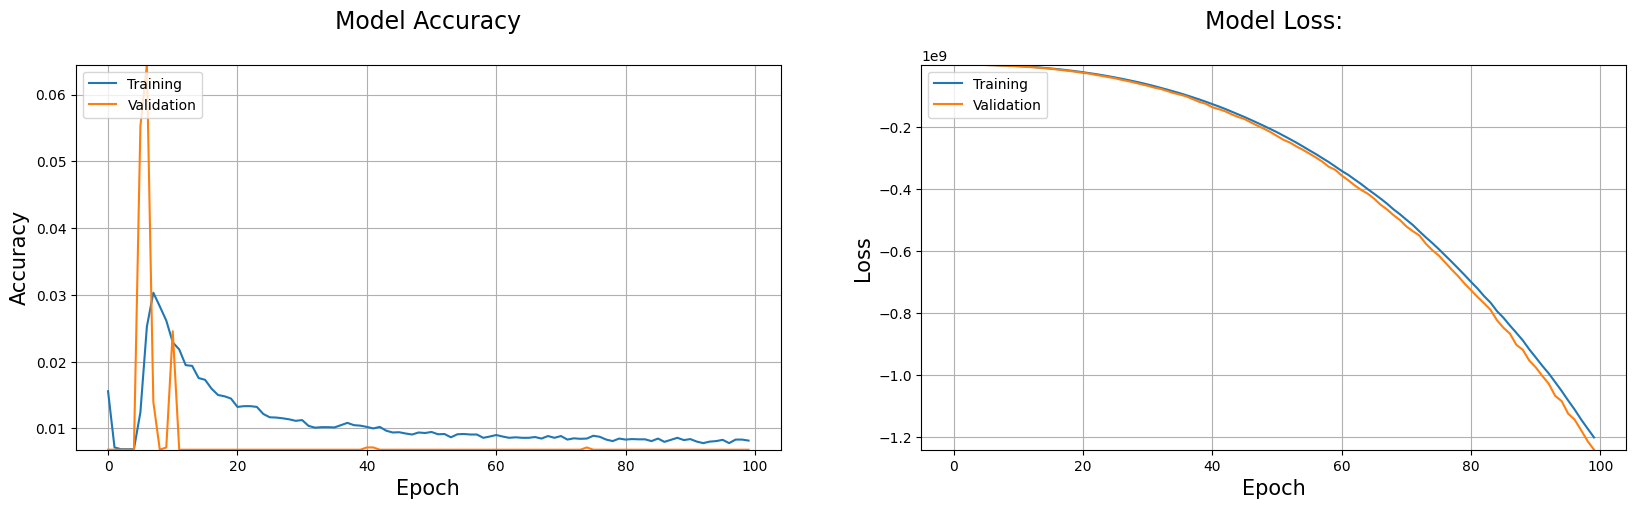

In [196]:
# Visualisation
plot_performance(history=rnn_history)


# **Model Building - sklearn**

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (12376, 10000), X_test size: (3094, 10000)


In [351]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [352]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [353]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.01%


In [354]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [355]:
nb_cm

array([[  37,    0,    0,    0,    2,    0,    0,    0,    1],
       [   0,  312,    0,    4,    6,    1,    0,    1,    6],
       [   0,    0,   21,    0,    1,    0,    0,    0,    0],
       [   0,    4,    0,  344,   14,    0,    0,    5,   15],
       [   0,   30,    1,   30, 1102,   15,    1,    6,   67],
       [   0,    0,    0,    2,    1,   47,    0,    0,    2],
       [   0,    1,    0,    0,    0,    1,    6,    0,    0],
       [   0,    1,    0,    2,    2,    0,    0,   71,    3],
       [   0,   12,    1,   18,   62,    8,    0,   14,  814]])

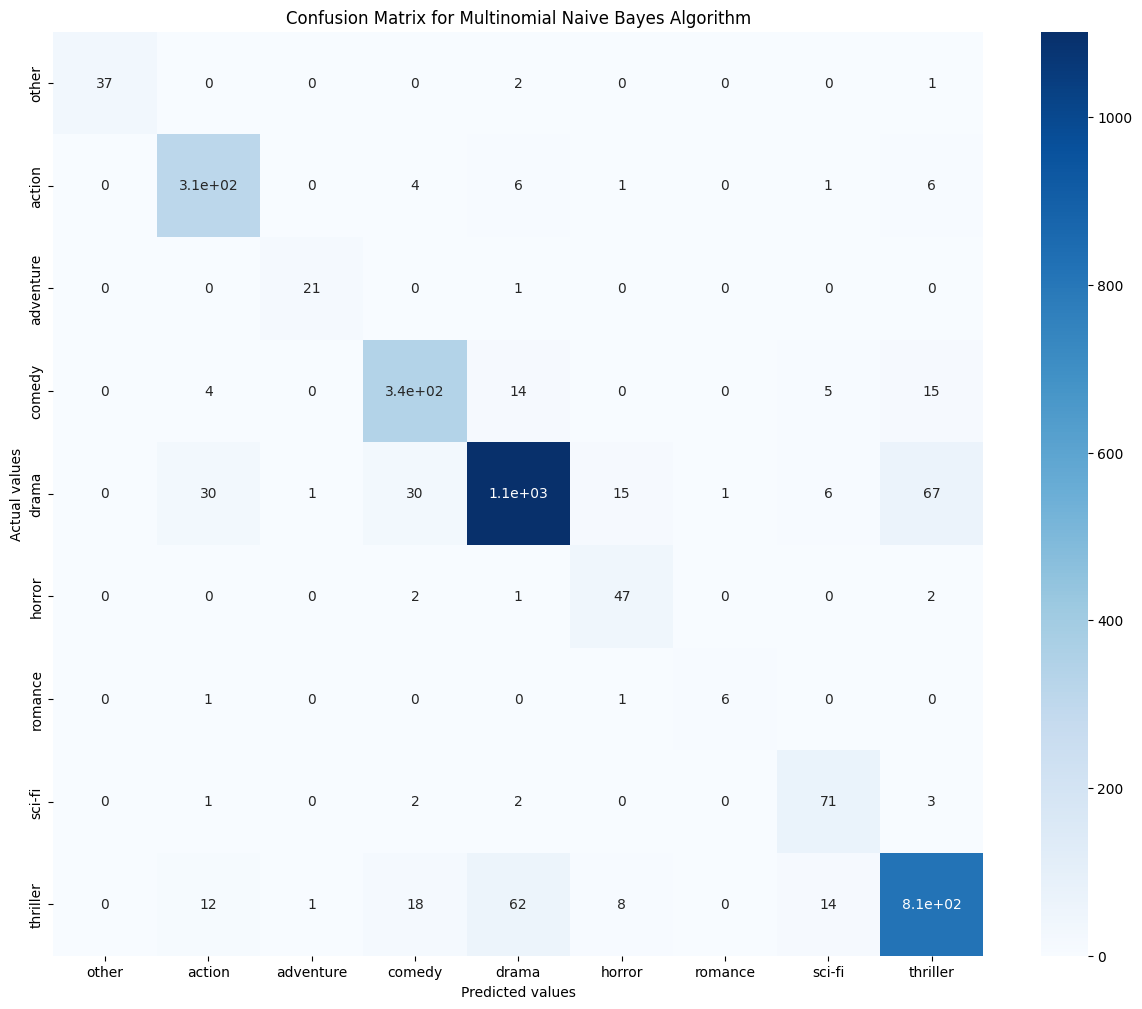

In [356]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [372]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('----------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.18%
Accuracy score for alpha=0.2 is: 90.66%
Accuracy score for alpha=0.3 is: 90.37%
Accuracy score for alpha=0.4 is: 90.01%
Accuracy score for alpha=0.5 is: 89.75%
Accuracy score for alpha=0.6 is: 89.5%
Accuracy score for alpha=0.7 is: 89.24%
Accuracy score for alpha=0.8 is: 89.04%
Accuracy score for alpha=0.9 is: 89.11%
Accuracy score for alpha=1.0 is: 89.01%
----------------------------------
The best accuracy is 91.18% with alpha value as 0.1


In [359]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [360]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)
  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [361]:
# For generating random integer
from random import randint

In [362]:
# Loading test dataset
test = pd.read_csv('/home/featurize/dataset/movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [364]:
test.shape

(5075, 2)

In [365]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [366]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: t one. But what do I know? I like Laurel and Hardy movies. DANA Really? I never really cared for those. Why does the fat one always have to be so mean to the skinny one? INT. ENID'S ROOM EVENING It's 9 30 PM. Enid is drawing in her sketchbook. She looks impatiently at the phone. Time passes it's 11 PM. She can't stand it anymore. INT. SEYMOUR'S APARTMENT CONTINUOUS Seymour picks up the phone. Dana is in the background getting some ice in the kitchen. SEYMOUR Uh... hello? ENID Hi, it's me... SEYMOUR Oh, hi... ENID So, what happened? SEYMOUR almost whispering Actually, it's kind of still happening... she's over here right now... I think everything's going pretty well... ENID What? You're kidding me... SEYMOUR Yeah, so I better go it's not really the best time to talk... ENID What, are you going to like have sex with her on your first date? SEYMOUR Jesus, Enid... I'll talk to you later... bye! He hangs up. Enid is stunned... Now what? She calls Rebecca. INT. OOMIE'S LIVING ROOM CO

In [367]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ars. Thank God looks don't matter as much as they once did. LOGAN, a wild gleam in his eye, moves out of the room, following where the others went, that LONG BLADED SCALPEL still clutched in his hand. The others follow. 94 INT. THE HOSPITAL NIGHT JOHN, SARAH AND LUKEY are facing out across the compound. A TEEMING TROPICAL RAIN has started to fall. JOHN This just ain't your day, is it, darlin' Sarah. SARAH can't help but snicker. Suddenly her head spins exhaustion is conquering her body as last. JOHN puts a big arm around her. JOHN Three more minutes. Then you can sleep. You gotta stay with it for three more minutes. McDERMOTT joins them and the group moves out into the rain. LUKEY waddles back through the maze of cots. LOGAN, SPIDER AND DIESEL have moved to about the center of the big room. The patients around them, their eyes bulging, look like lemurs. LOGAN How do we know she's alright? How do we know? The same intonation again. This guy's wrapping is definitely coming loose.

In [368]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: nry passes the joint to Anthony. Anthony smokes it. MR. HENRY But you're thieves. It's what you are. ANTHONY Yeah. MR. HENRY It's an esoteric journey. Anthony passes the joint back to Mr. Henry. MR. HENRY We're renegades from despair. ANTHONY nods Can I ask you something, Mr. Henry? MR. HENRY Absolutely. ANTHONY Why'd you want to help us? MR. HENRY inhales, pause, holding in smoke Because I was like you once. And there was no one there to help me. Mr. Henry exhales the smoke. He hands the joint to Anthony. Anthony takes a hit. They stare out at the darkness. INT. BOB'S HOUSE. NIGHT Anthony and Dignan are sitting in the kitchen. Anthony's got on a t shirt and boxers. Dignan's wearing a bathrobe. All the lights in the house are out except one in the kitchen. Anthony's drinking a glass of milk. Dignan's got orange juice. DIGNAN Next week we'll be drinking pi a coladas. ANTHONY nods Hopefully this trip'll go a little smoother than the last one. Dignan nods. ANTHONY Or I might end u

In [369]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: inishing touches to Jerome's hair. He wheels himself out of the way. The final accomplice in Jerome's deception, a BLACK MARKET COMPUTER GRAPHICS DESIGNER, takes Jerome's photo with a video camera. Manipulating the captured image, the Designer morphs Jerome's face into the face of Eugene. The resulting photo that spits out of a printer is neither one nor the other but an acceptable combination of the two. INT. HOUSING PROJECT APARTMENT. DAY. EUGENE is starting to prepare Jerome's specimen bags for the first time. He winces in pain as he plucks several hairs from his head. JEROME, now out of his casts, prepares job applications. EUGENE still grimacing, referring to the follicles You really need that much? JEROME More than that. You'll get used to it. EUGENE yanking out another hair God, what wouldn't you do to leave the planet? JEROME inspecting a hair follicle Leave? Just a few million years ago every atom in this hair in our bodies was a part of a star. I don't see it as leavi

## TF-IDF

In [68]:
# # Put it in a file and stop it because it's too big.
import numpy as np
 
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer
 
def sklearn_tfidf():
    train_data = open('/home/featurize/dataset/movie_val1.csv')
    samples = []
    for data in  train_data:
        samples.append(data)
    
    vectorizer = CountVectorizer() #Converting words in text to a word frequency matrix
    X = vectorizer.fit_transform(samples) #Counting the number of occurrences of a word
       
    transformer = TfidfTransformer()  
    tfidf = transformer.fit_transform(X)  #Statistics of the word frequency matrix X into TF-IDF values
    for i in range(len(samples)):
        print(samples[i])
        print(tfidf.toarray()[i])
sklearn_tfidf()



id,text,genre

[0. 0. 0. ... 0. 0. 0.]
0,"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewher

KeyboardInterrupt: 

# text matching task

## 1.1 Using the sentence_transformers package

In [65]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [66]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
 
sentences = [
    'She cant stand it anymore.',
    'I dont see it as leaving. ',
    'You ll get used to it.'
    ]
sentence_embeddings = model.encode(sentences)
 
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

/environment/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/environment/miniconda3/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Sentence: She cant stand it anymore.
Embedding: [-4.96767879e-01 -4.66517568e-01  7.31650949e-01  1.36780515e-01
 -7.18036532e-01 -1.33838713e-01  1.93751246e-01  3.21577005e-02
 -4.15003926e-01  5.98054588e-01  3.48344266e-01 -3.90772596e-02
  3.95547181e-01  2.71866322e-01  7.07978964e-01  1.69023931e-01
  1.61616251e-01 -5.54133318e-02 -8.24754417e-01 -1.08984673e+00
 -3.33068632e-02 -2.09181711e-01  4.71347392e-01  1.46679267e-01
 -2.83551097e-01  1.02381635e+00  5.95521688e-01 -2.72083223e-01
 -8.24737400e-02  8.41009319e-02  1.88313216e-01  4.28532273e-01
 -9.49644367e-04  7.71964574e-03  4.31190789e-01 -5.08984149e-01
  1.73890486e-01 -4.48024213e-01  1.72951758e-01 -1.08949995e+00
 -3.14511627e-01 -9.47183728e-01 -1.11600652e-01  1.37532085e-01
  1.99710816e-01  2.15249166e-01 -1.11021936e+00  5.87940961e-02
 -1.55773270e+00 -9.28892791e-01 -4.22675133e-01  5.67046881e-01
  1.71987140e+00 -1.18928432e-01 -5.23850799e-01 -3.59969348e-01
 -4.11145002e-01  1.14250886e+00 -5.031756

In [67]:
from scipy.spatial import distance
print(1 - distance.cosine(sentence_embeddings[0], sentence_embeddings[1]))
print(1 - distance.cosine(sentence_embeddings[0], sentence_embeddings[2]))
print(1 - distance.cosine(sentence_embeddings[1], sentence_embeddings[2]))

0.7611411809921265
0.5598791241645813
0.5903242826461792
